In [95]:
#import the warnings.
import warnings as wrn
wrn.filterwarnings('ignore')

In [96]:
#import the useful libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# here we import the data .
a_df = pd.read_csv("Downloads/Uber Request Data.csv", encoding="latin-1")

In [98]:
a_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [99]:
# here we check the info of the columns.
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [100]:
# here we check the null values in all columns.
a_df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

# Analysis the "Driver id" column

In [101]:
a_df.shape

(6745, 6)

In [102]:
a_df["Driver id"].isna().sum()

2650

In [103]:
# here we fill the null value with 0 ( 0=unknown)
a_df["Driver id"] = a_df["Driver id"].fillna(0)

In [104]:
a_df["Driver id"].isna().sum()

0

In [105]:
# here we change the dtype of  a_df["Driver id"] column.

a_df["Driver id"] = a_df["Driver id"].astype(int)

In [106]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request id         6745 non-null   int64 
 1   Pickup point       6745 non-null   object
 2   Driver id          6745 non-null   int32 
 3   Status             6745 non-null   object
 4   Request timestamp  6745 non-null   object
 5   Drop timestamp     2831 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 290.0+ KB


# Analyis the "Request timestamp" and "Drop timestamp" column 

In [107]:
a_df[["Request timestamp","Drop timestamp"]].head()

,Request timestamp,Drop timestamp
0,11/7/2016 11:51,11/7/2016 13:00
1,11/7/2016 17:57,11/7/2016 18:47
2,12/7/2016 9:17,12/7/2016 9:58
3,12/7/2016 21:08,12/7/2016 22:03
4,13-07-2016 08:33:16,13-07-2016 09:25:47


we can see and understand that date and time both are mix in one column so we extract date and time from both tables and makes new another column with proper dtype

In [108]:
# here we split 'Request timestamp' from " " and make new column 

a_df[['request_date', 'request_time']] = a_df['Request timestamp'].str.split(" ", expand=True)

In [109]:
# here we split 'Drop timestamp' from " " and make new column 
a_df[['drop_date', 'drop_time']] = a_df['Drop timestamp'].str.split(" ", expand=True)

In [110]:
a_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_date,request_time,drop_date,drop_time
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,11/7/2016,11:51,11/7/2016,13:00
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,11/7/2016,17:57,11/7/2016,18:47
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,12/7/2016,9:17,12/7/2016,9:58
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,12/7/2016,21:08,12/7/2016,22:03
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,13-07-2016,08:33:16,13-07-2016,09:25:47


In [111]:
# here we drop the both column "Request timestamp" and "Drop timestamp"
a_df.drop('Request timestamp', inplace = True, axis = 1 )
a_df.drop('Drop timestamp', inplace = True, axis = 1 )

In [112]:
a_df.head()

,Request id,Pickup point,Driver id,Status,request_date,request_time,drop_date,drop_time
0,619,Airport,1,Trip Completed,11/7/2016,11:51,11/7/2016,13:00
1,867,Airport,1,Trip Completed,11/7/2016,17:57,11/7/2016,18:47
2,1807,City,1,Trip Completed,12/7/2016,9:17,12/7/2016,9:58
3,2532,Airport,1,Trip Completed,12/7/2016,21:08,12/7/2016,22:03
4,3112,City,1,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47


In [113]:
# here we once again check the data type of all columns
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Request id    6745 non-null   int64 
 1   Pickup point  6745 non-null   object
 2   Driver id     6745 non-null   int32 
 3   Status        6745 non-null   object
 4   request_date  6745 non-null   object
 5   request_time  6745 non-null   object
 6   drop_date     2831 non-null   object
 7   drop_time     2831 non-null   object
dtypes: int32(1), int64(1), object(6)
memory usage: 395.3+ KB


# Analysis the  request_date  and request_time column

In [114]:
# here we first change the data type of a column to make it in proper format
a_df['request_date'] = a_df['request_date'].astype(str)

In [115]:
a_df['request_date'] = a_df['request_date'].str.replace('/', '-')

In [116]:
a_df['request_date'] = pd.to_datetime(a_df['request_date'], format="%d-%m-%Y")


In [117]:
a_df['request_time'] = pd.to_datetime(a_df['request_time'])

# Analysis the  drop_date  and drop_time column

In [118]:
# here we first change the data type of a column to make it in proper format
a_df['drop_date'] = a_df['drop_date'].astype(str)

In [119]:
a_df['drop_date'] = a_df['drop_date'].str.replace('/', '-')

In [120]:
a_df['drop_date'] = pd.to_datetime(a_df['drop_date'], format="%d-%m-%Y")

In [121]:
a_df['drop_time'] = pd.to_datetime(a_df['drop_time'])

In [122]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Request id    6745 non-null   int64         
 1   Pickup point  6745 non-null   object        
 2   Driver id     6745 non-null   int32         
 3   Status        6745 non-null   object        
 4   request_date  6745 non-null   datetime64[ns]
 5   request_time  6745 non-null   datetime64[ns]
 6   drop_date     2831 non-null   datetime64[ns]
 7   drop_time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](4), int32(1), int64(1), object(2)
memory usage: 395.3+ KB


In [123]:
#



In [124]:
a_df['time_diff'] = a_df['drop_time'] - a_df['request_time']

In [125]:
a_df['request_hour'] = a_df['request_time'].dt.hour.astype(int)

In [126]:
bins = ['00:00:00', '03:00:00', '11:00:00','15:00:00', '17:00:00', '23:59:59']
labels = ['Late Night', 'Early Morning', 'Mid-Day','Evening', 'Late Evening']

a_df['timeofday'] = pd.cut(pd.to_timedelta(a_df['request_time'].dt.time.astype(str)), bins=pd.to_timedelta(bins), labels=labels, ordered=False)

In [127]:
a_df.drop('request_time',inplace = True, axis = 1)

In [128]:
a_df.drop('drop_time',inplace = True, axis = 1)

##### Let's see the data 

In [129]:
a_df

,Request id,Pickup point,Driver id,Status,request_date,drop_date,time_diff,request_hour,timeofday
0,619,Airport,1,Trip Completed,2016-07-11,2016-07-11,0 days 01:09:00,11,Mid-Day
1,867,Airport,1,Trip Completed,2016-07-11,2016-07-11,0 days 00:50:00,17,Late Evening
2,1807,City,1,Trip Completed,2016-07-12,2016-07-12,0 days 00:41:00,9,Early Morning
3,2532,Airport,1,Trip Completed,2016-07-12,2016-07-12,0 days 00:55:00,21,Late Evening
4,3112,City,1,Trip Completed,2016-07-13,2016-07-13,0 days 00:52:31,8,Early Morning
...,...,...,...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15,NaT,NaT,23,Late Evening
6741,6752,Airport,0,No Cars Available,2016-07-15,NaT,NaT,23,Late Evening
6742,6751,City,0,No Cars Available,2016-07-15,NaT,NaT,23,Late Evening
6743,6754,City,0,No Cars Available,2016-07-15,NaT,NaT,23,Late Evening


In [130]:
# here we check the shape of a column
a_df.shape

(6745, 9)

In [131]:
# here we check the null values of a column
a_df.isna().sum()

Request id         0
Pickup point       0
Driver id          0
Status             0
request_date       0
drop_date       3914
time_diff       3914
request_hour       0
timeofday          1
dtype: int64

# Here we start the visualization.

#### Status distribution 

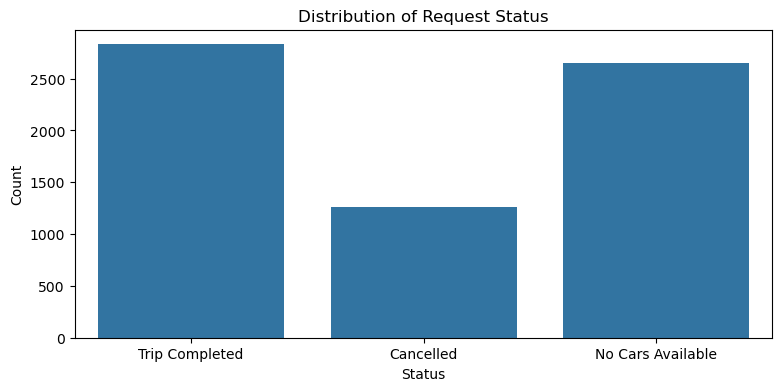

In [140]:
plt.figure(figsize=(9,4))
sns.countplot(data=a_df, x='Status')
plt.title('Distribution of Request Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


Conclusion: The issue of car unavailability and cancellations represents a significant portion of failed requests, contributing to potential revenue loss. Addressing these could improve Uber's operational efficiency.

#### Pickup Point vs. Status

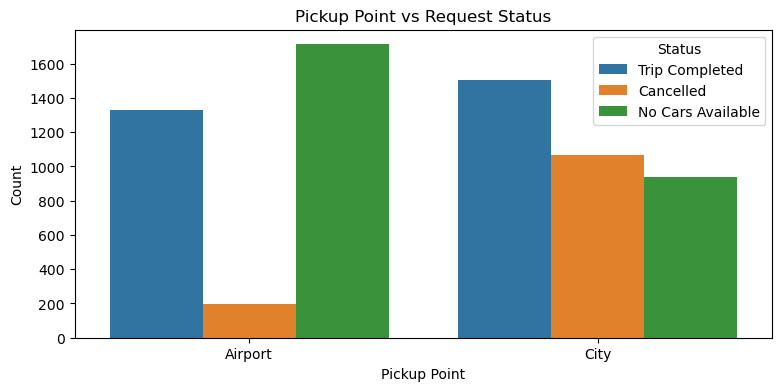

In [155]:
# Pickup Point vs Status
plt.figure(figsize=(9,4))
sns.countplot(data=a_df, x='Pickup point', hue='Status')
plt.title('Pickup Point vs Request Status')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


Conclusion : The airport faces a major issue of car availability, while the city struggles more with cancellations. Addressing the shortage of cars at the airport and reducing cancellations in the city would improve Uber's service and reduce revenue loss.

#### Request Hour vs. Status

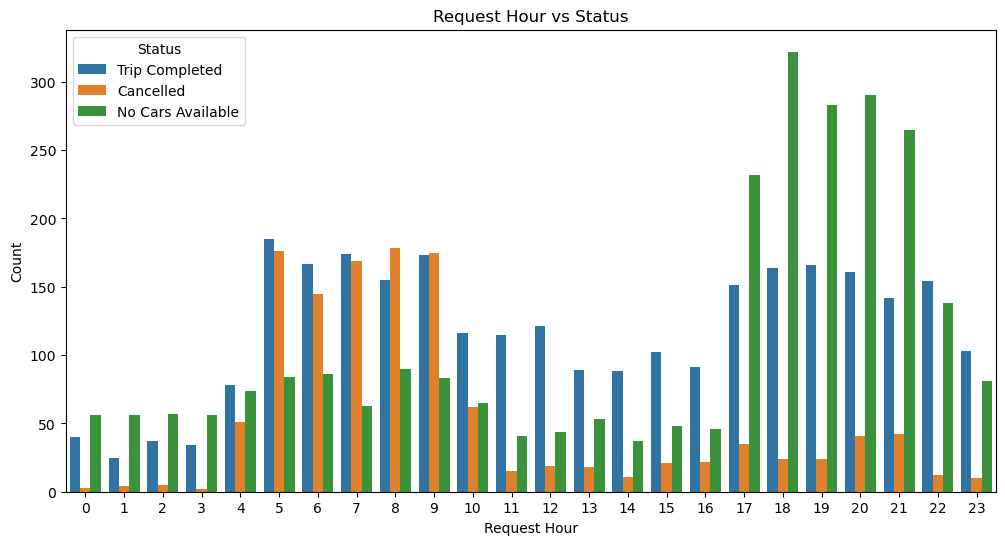

In [143]:
# Request Hour vs Status
plt.figure(figsize=(12,6))
sns.countplot(data=a_df, x='request_hour', hue='Status')
plt.title('Request Hour vs Status')
plt.xlabel('Request Hour')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


Conclusion: The chart indicates that early morning trips are frequently canceled, while evening peak hours (5 PM - 9 PM) experience high demand and limited car availability.

#### Request Hour vs. Pickup Point (Stacked Bar Plot for Status)

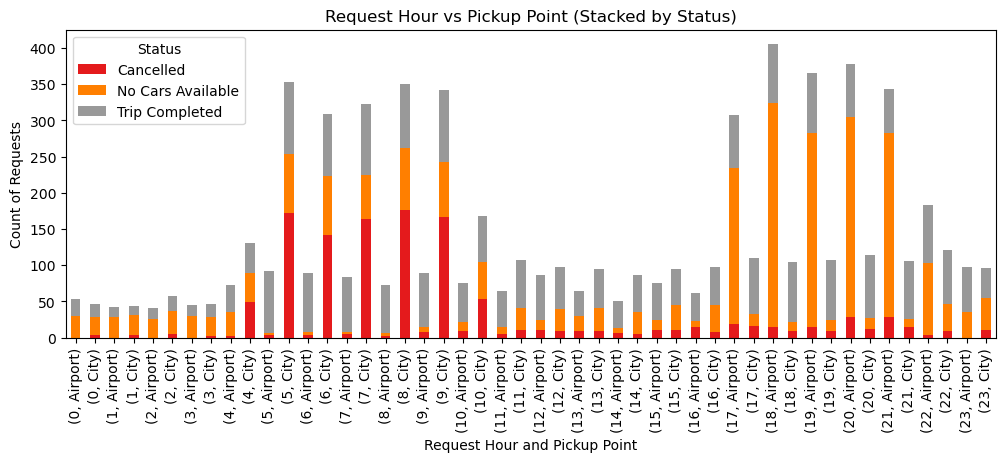

In [156]:
hour_pickup_status = a_df.groupby(['request_hour', 'Pickup point', 'Status']).size().unstack(fill_value=0)

# Plot stacked bar plot
hour_pickup_status.plot(kind='bar', stacked=True, figsize=(12, 4), colormap='Set1')
plt.title('Request Hour vs Pickup Point (Stacked by Status)')
plt.xlabel('Request Hour and Pickup Point')
plt.ylabel('Count of Requests')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()


#### Status Distribution by Time of Day (Morning, Afternoon, Evening, Night)

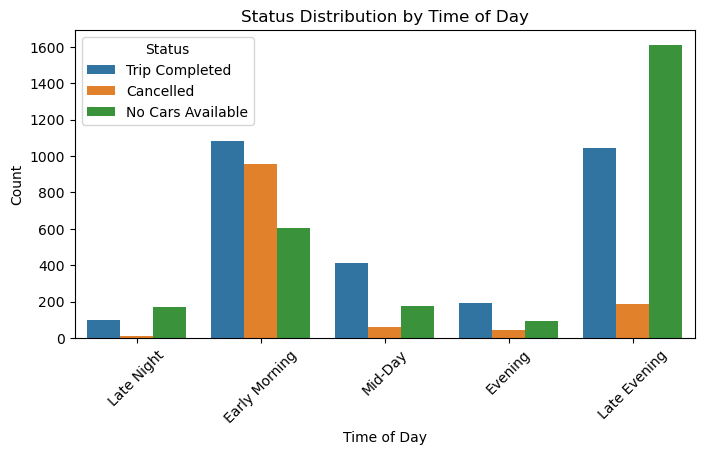

In [157]:
plt.figure(figsize=(8,4))
sns.countplot(data=a_df, x='timeofday', hue='Status')
plt.title('Status Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()



Conclusion: The chart shows that most trips are completed during the late evening and early morning hours. Cancellations are highest during the late night and mid-day periods, while "No Cars Available" issues are more frequent in the early morning and late evening.


#### Cancellations per Driver

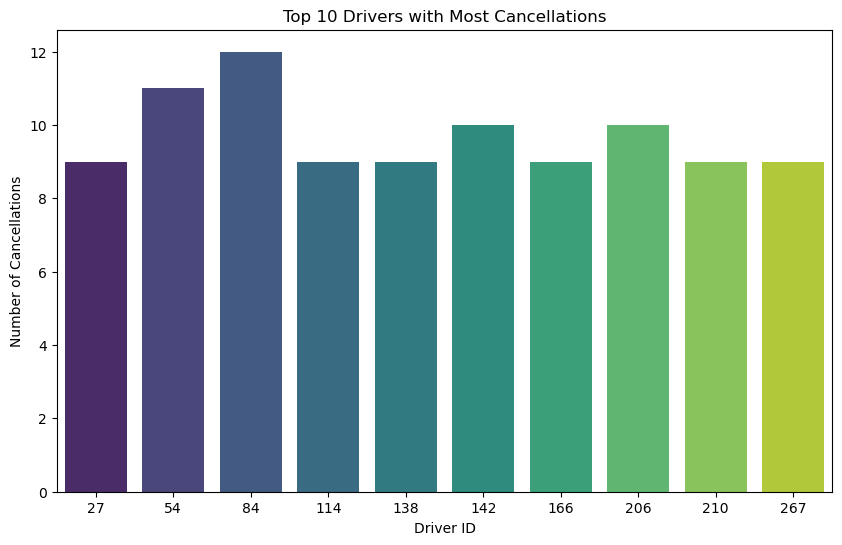

In [152]:
cancelled_drivers = a_df[a_df['Status'] == 'Cancelled']['Driver id'].value_counts().head(10)

# Plotting top 10 drivers with most cancellations
plt.figure(figsize=(10,6))
sns.barplot(x=cancelled_drivers.index, y=cancelled_drivers.values, palette='viridis')
plt.title('Top 10 Drivers with Most Cancellations')
plt.xlabel('Driver ID')
plt.ylabel('Number of Cancellations')
plt.show()



Conclusion: The chart shows the top 10 drivers with the most cancellations. Driver ID 84 has the highest number of cancellations, followed by Driver ID 54 and Driver ID 114.


#### Time of Day and Driver Availability

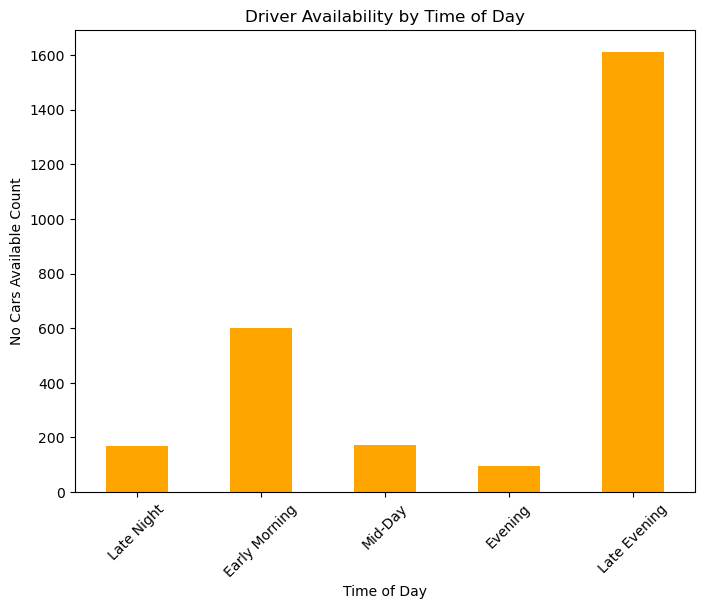

In [154]:
driver_availability = a_df[a_df['Status'] == 'No Cars Available'].groupby('timeofday').size()

# Plotting the result
plt.figure(figsize=(8,6))
driver_availability.plot(kind='bar', color='orange')
plt.title('Driver Availability by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('No Cars Available Count')
plt.xticks(rotation=45)
plt.show()


##### Overall Conclusion:
The ride-sharing service is experiencing high demand and capacity issues, particularly during evening peak hours. Cancellations are frequent, especially in the late night and mid-day periods. Some drivers have a higher tendency to cancel trips, which could be due to various factors such as personal reasons, vehicle issues, or traffic congestion.
To improve the service, the company may need to increase the number of available drivers during peak hours, implement measures to reduce cancellations, and investigate the reasons behind driver cancellations.
